<img src="../images/Boeing_full_logo.png" alt="Boeing" style="width: 400px;"/>

<br/>

<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 200px;"/>

# Carga y manipulación de datos con pandas

_ __pandas es una biblioteca de análisis de datos en Python__ que nos provee de las estructuras de datos y herramientas para realizar análisis de manera rápida. Se articula sobre la biblioteca NumPy y nos permite enfrentarnos a situaciones en las que tenemos que manejar datos reales que requieren seguir un proceso de carga, limpieza, filtrado, reduccióń y análisis. _

_En esta clase veremos como cargar y guardar datos, las características de las pricipales estructuras de pandas y las aplicaremos a algunos problemas._

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Cargando los datos y explorándolos

In [2]:
!head ../data/tabernas_meteo_data.txt

Vemos que los datos no están en formato CSV, aunque sí tienen algo de estructura. Si intentamos cargarlos con pandas no tendremos mucho éxito:

In [3]:
pd.read_csv("../data/tabernas_meteo_data.txt").head(5)

,FECHA DIA Al04TMax Al04TMin Al04TMed Al04Precip
0,-------- --- -------- -------- -------- ------...
1,13-12-16 348 14.6 4.0 8.9 ...
2,12-12-16 347 15.9 3.0 8.7 ...
3,11-12-16 346 16.9 5.0 10.2 ...
4,10-12-16 345 16.4 6.3 10.9 ...


Tenemos que hacer los siguientes cambios:

* Saltar las primeras líneas.
* Separar los campos por un número arbitrario de espacios en blanco.
* Descartar la columna del día del año (podemos calcularla luego).
* Parsear las fechas en el formato correcto.

In [4]:
data = pd.read_csv(
    "../data/tabernas_meteo_data.txt",
    delim_whitespace=True, usecols=(0, 2, 3, 4, 5), header=None, skiprows=2,
    names=['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],
    parse_dates=['DATE'],
    #date_parser=lambda x: pd.datetime.strptime(x, '%d-%m-%y')  # Parseo manual
    dayfirst=True,  # ¡Importante
    #index_col=["date"]  # Si queremos indexar por fechas
)#.iloc[::-1]  # Si queremos darle la vuelta

# Mostrando sólo las primeras o las últimas líneas
data.head()

,DATE,TMAX,TMIN,TMED,PRECIP
0,2016-12-13,14.6,4.0,8.9,0.2
1,2016-12-12,15.9,3.0,8.7,0.2
2,2016-12-11,16.9,5.0,10.2,0.2
3,2016-12-10,16.4,6.3,10.9,0.2
4,2016-12-09,13.6,9.5,11.2,1.8


In [5]:
data.dtypes

DATE      datetime64[ns]
TMAX             float64
TMIN             float64
TMED             float64
PRECIP           float64
dtype: object

<div class="alert alert-info">Para acordarnos de cómo parsear las fechas: http://strftime.org/</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 5 columns):
DATE      4732 non-null datetime64[ns]
TMAX      4713 non-null float64
TMIN      4713 non-null float64
TMED      4713 non-null float64
PRECIP    4713 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 184.9 KB


In [7]:
data.describe()

,TMAX,TMIN,TMED,PRECIP
count,4713.000000,4713.000000,4713.000000,4713.000000
mean,23.224761,9.676872,16.276321,0.650583
std,7.318656,6.263303,6.638529,3.273346
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.300000,4.500000,10.600000,0.000000
50%,22.900000,9.700000,16.000000,0.000000
75%,29.200000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


In [8]:
# Una vez convertido en un objeto fecha se pueden obtener cosas como:
data.DATE.dt.dayofweek.head()

0    1
1    0
2    6
3    5
4    4
Name: DATE, dtype: int64

## Accediendo a los datos 

In [9]:
# Accediendo como clave
data['TMAX'].head()

0    14.6
1    15.9
2    16.9
3    16.4
4    13.6
Name: TMAX, dtype: float64

In [10]:
# Accediendo como atributo
data.TMIN.head()

0    4.0
1    3.0
2    5.0
3    6.3
4    9.5
Name: TMIN, dtype: float64

In [11]:
# Accediendo a varias columnas a la vez
data[['TMAX', 'TMIN']].head()

,TMAX,TMIN
0,14.6,4.0
1,15.9,3.0
2,16.9,5.0
3,16.4,6.3
4,13.6,9.5


In [12]:
# Modificando sus valores
data[['TMAX', 'TMIN']] / 10

,TMAX,TMIN
0,1.46,0.40
1,1.59,0.30
2,1.69,0.50
3,1.64,0.63
4,1.36,0.95
5,1.45,0.54
6,1.57,0.61
7,1.77,0.71
8,1.66,0.79
9,1.18,1.01


In [13]:
# Accediendo a una fila
data.loc[1]

DATE      2016-12-12 00:00:00
TMAX                     15.9
TMIN                        3
TMED                      8.7
PRECIP                    0.2
Name: 1, dtype: object

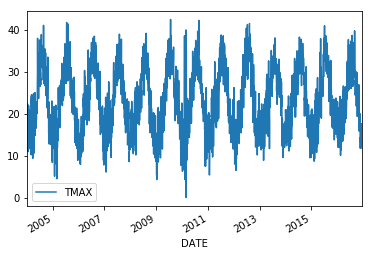

In [14]:
data.plot(x='DATE', y=['TMAX'])

In [15]:
data['T_MED_2'] = (data.TMIN + data.TMAX) / 2
data

,DATE,TMAX,TMIN,TMED,PRECIP,T_MED_2
0,2016-12-13,14.6,4.0,8.9,0.2,9.30
1,2016-12-12,15.9,3.0,8.7,0.2,9.45
2,2016-12-11,16.9,5.0,10.2,0.2,10.95
3,2016-12-10,16.4,6.3,10.9,0.2,11.35
4,2016-12-09,13.6,9.5,11.2,1.8,11.55
5,2016-12-08,14.5,5.4,10.4,0.0,9.95
6,2016-12-07,15.7,6.1,10.1,0.2,10.90
7,2016-12-06,17.7,7.1,13.4,0.0,12.40
8,2016-12-05,16.6,7.9,11.7,0.0,12.25
9,2016-12-04,11.8,10.1,10.9,23.8,10.95


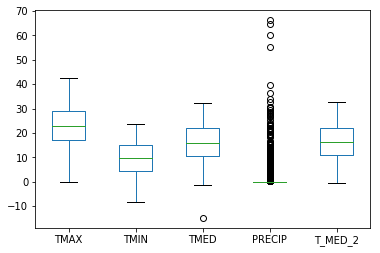

In [16]:
data.plot.box()

In [17]:
data[data.TMED.isnull()]

,DATE,TMAX,TMIN,TMED,PRECIP,T_MED_2
348,2015-12-31,NaN,NaN,NaN,NaN,NaN
1586,2012-08-11,NaN,NaN,NaN,NaN,NaN
1587,2012-08-10,NaN,NaN,NaN,NaN,NaN
1588,2012-08-09,NaN,NaN,NaN,NaN,NaN
1589,2012-08-08,NaN,NaN,NaN,NaN,NaN
1590,2012-08-07,NaN,NaN,NaN,NaN,NaN
1591,2012-08-06,NaN,NaN,NaN,NaN,NaN
1592,2012-08-05,NaN,NaN,NaN,NaN,NaN
1593,2012-08-04,NaN,NaN,NaN,NaN,NaN
1594,2012-08-03,NaN,NaN,NaN,NaN,NaN


In [18]:
data['month'] = data.DATE.dt.month
data['day'] = data.DATE.dt.day

In [19]:
group_by_day = data.groupby(by=[data.DATE.dt.month, data.DATE.dt.day])
# group_by_day = data.groupby(by=(data.month))
# group_by_day = data.groupby(pd.TimeGrouper('M'))

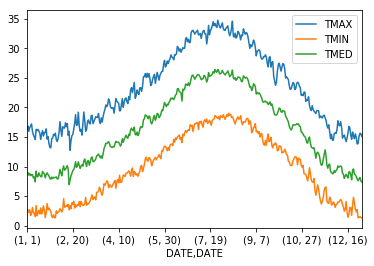

In [20]:
group_by_day.mean().plot(y=["TMAX", "TMIN", "TMED"])

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano, y Álex Sáez 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())